# DPI Response GUI

This graphical user interface(GUI) aims to help user choose the right set of parameters for differential pair integrator circuit(DPI) simulation. The GUI displays how changing parameters affect the dynamical behaivor of the DPI circuit simulation. One can
* Generate a spiking input pattern either randomly or by indicating the exact spike times.

## Input Generation

There are two options for input generation. One can either use the custom generation option or random generation option.

### Custom Spike Train Generation

Using rockpool TSEvent, discrete time series are represented bu tuples $ (t_k, c_k) $, where $t_k$ are sample times and $c_k$ is a "channel" associated with each sample (e.g. the source of an event). Spike rasters are also discrete time series and for custom generation, one need to provide exact spike times and their channels accordingly. In the cell #2, a manual spike generation procedure is presented.

In [1]:
import numpy as np
from rockpool.timeseries import TSEvent

# - Plotting imports and config
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 4]
plt.rcParams['figure.dpi'] = 300

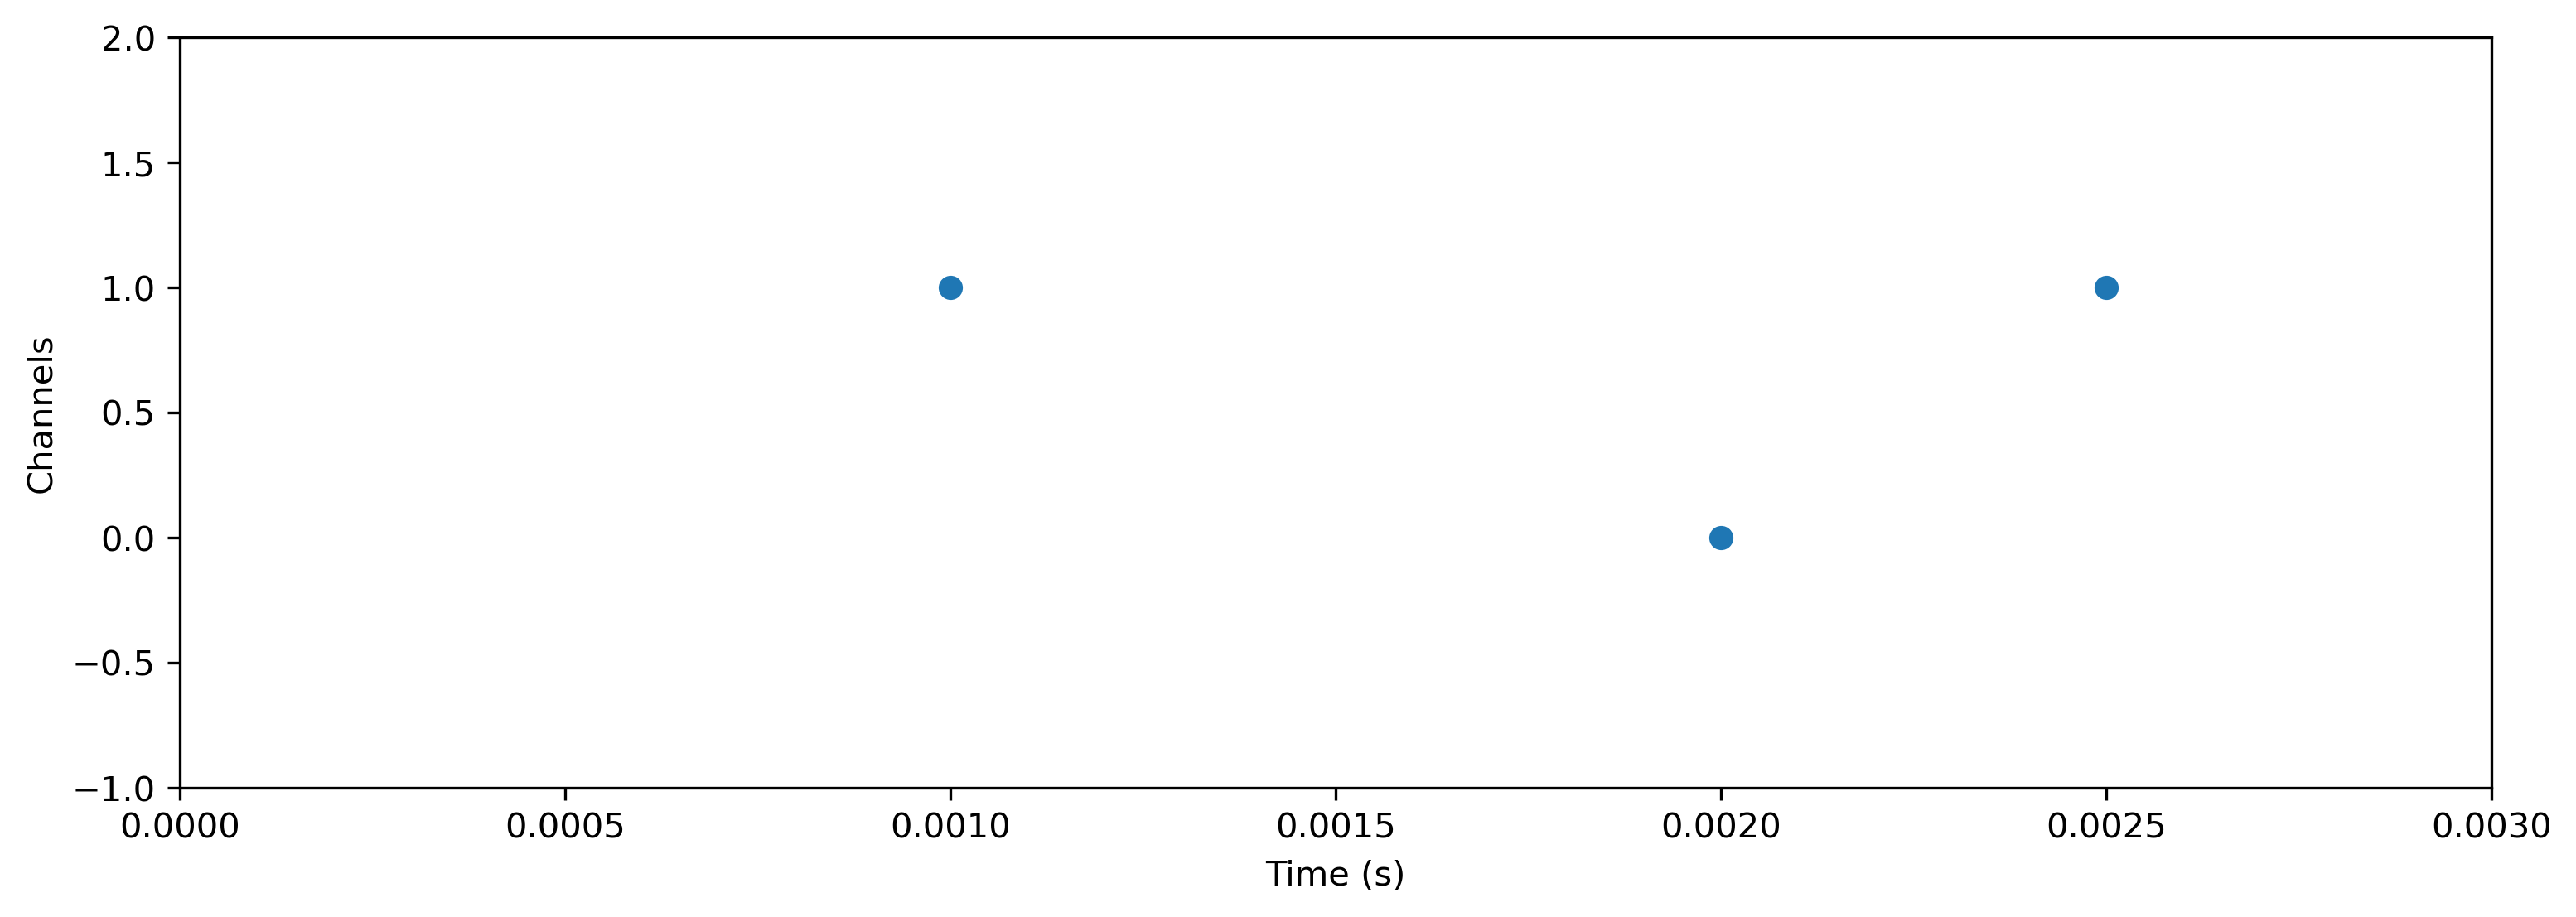

In [2]:
times = [1e-3, 2e-3, 2.5e-3]
channels = [1, 0, 1]

ts_spikes = TSEvent(
    times = times,
    channels = channels,
    t_start = 0,
    t_stop = 3e-3,
)

ts_spikes.plot();

### Random Spike Train Generation

Random spike train generation is done by choosing a duration, the number of channels, a spike rate in Hz, simulation time step, and optionally a name. Then a poisson process generates the input spike trains. In cell 4 below, a manual generation procedure is shown.

In [3]:
# [] TODO: change the import path
import sys
sys.path.insert(
    0,
    "/home/ugurc/SynSense Dropbox/Ugurcan Cakal/repos/rockpool__dynapse/rockpool/devices/dynapse",
)

from utils import random_spike_train

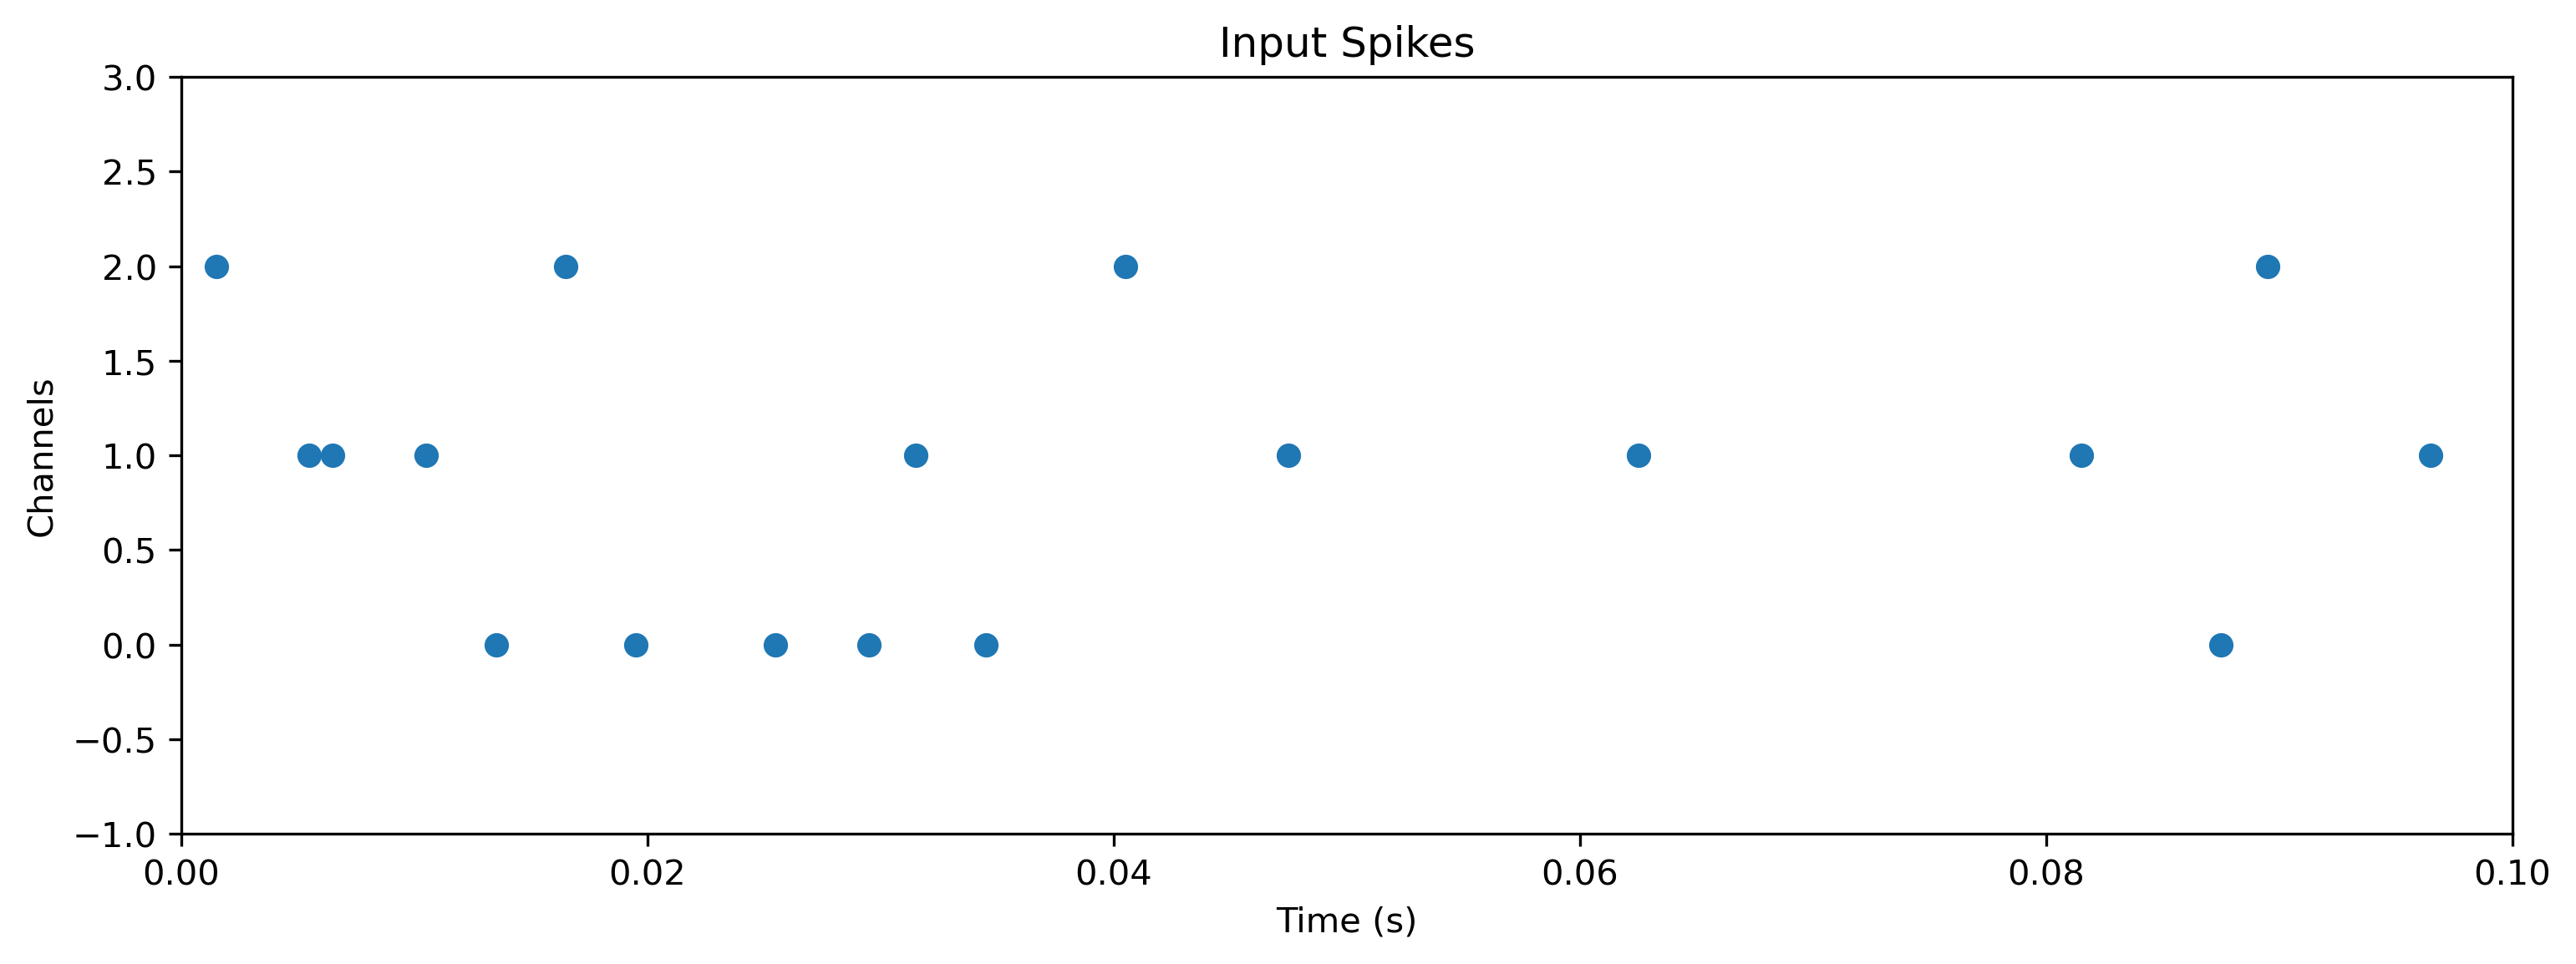

In [4]:
ts_spikes_random =  random_spike_train(
    duration = 100e-3,
    n_channels = 3,
    rate = 50,
    dt = 1e-3,
    name = "Input Spikes"
)
ts_spikes_random.plot();

## DPI Simulation

The input pattern generated drives the DPI circuit introduced in [1]. 

[1] C. Bartolozzi and G. Indiveri, “Synaptic dynamics in analog vlsi,” Neural Comput., vol. 19, no. 10, p. 2581–2603, Oct. 2007. [Online]. Available: https://doi.org/10.1162/neco.2007.19.10.2581

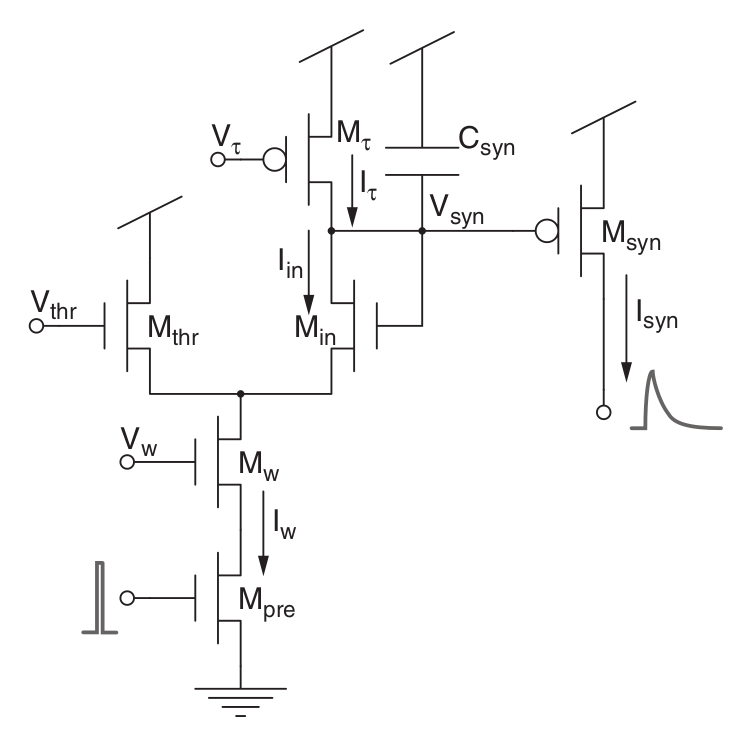

In [5]:
from IPython.display import Image
Image('images/dpi.png')

The simulator accepts a voltage pulse train as input and solve the differential equation below to maintain a state.   

Assume that $I_w >> I_{\tau}$ and following $I_{syn} >> I_{th}$ then use

$\tau \dfrac{d}{dt} I_{syn} + I_{syn} = \dfrac{I_w I_{th}}{I_{\tau}}$


\\[
\begin{align}
 I_{syn} (t) = \begin{cases} \dfrac{I_{th} I_{w}}{I_{\tau}}\left( 1 - e^{\frac{-(t-t_i^-)}{\tau}} \right) + I_{syn}^{-} e^{\frac{-(t-t_i^-)}{\tau}} &\text{charge} \\ I_{syn}^{+} \cdot e^{\frac{-(t-t_i^+)}{\tau}} &\text{discharge}\end{cases}
\end{align}
\\]

Here there are three important groups of parameters. The first group is layout parameters. They all depended on the actual physical silicon layout of the chip. Therefore, most of the time, there is no need to change those parameters. The GUI still makes it enable to play with those.

| Constant     | Value                                      | Comments                                      |
| ------------ | ------------------------------------------ | --------------------------------------------- |
| $\kappa$     | $\frac{\kappa_n + \kappa_p}{2}$ = 0.705    | Mean kappa                                    |
| $\kappa_n$   | 0.75                                       | Subthreshold slope factor (n-type transistor) |
| $\kappa_p$   | 0.66                                       | Subthreshold slope factor (p-type transistor) |
| $U_{T}$      | 25 mV                                      | Thermal voltage                               |
| $I_0$        | 0.5 pA                                     | Dark current                                  |
| $C_{syn}$    | 1 nF                                      | Synaptic capacitance                          |

The second group is the free parameters. These are the currents and can be configured by changing the biases. 

| Parameter    | Value                                      | Comments                                      |
| ------------ | ------------------------------------------ | --------------------------------------------- |
| $I_{\tau}$   | 1 nA                                       | Leakage Current                               |
| $I_{th}$     | 1 nA                                       | Threshold current, a.k.a. gain current        |
| $I_{w}$      | 1 $\mu$A                                   | Weight current                                |

The third group is dependends. These ones are important since they are seen on the equaiton but they are depended on the parameters that are introduced before. Therefore, they are only shown. In order to change them, one need to change the regarding independent parameters. 

| Dependend          | Formula                                    | Comments                                |
| ------------------ | ------------------------------------------ | --------------------------------------- |
| $\tau$             | $\dfrac{C U_{T}}{\kappa I_{\tau}}$         | Synaptic time constant                  |
| $I_{syn_{\infty}}$ | $\dfrac{I_{th}}{I_{\tau}}I_{w}$            | Steady State Current                    |


In cell 6 below, the GUI is constructed. There are two tabs that exist, one for creating an input spike train and the other one for observing the state change with respect to time given a parameter set.

In the Input Spikes tab, one can select one of the custom or random spike generation options. In the custom generation, the exact spike times and their respected channels should be given manually, seperated by comma. Then the result of any parameter change can be observed immediately. For the random option, there is also an Hit Me! button. With this, one can re-initiate the poisson process and obtain a different spike train.

In the DPI Response tab, one needs to click the Run button to run the simulation. Also, at any time, user can set all the parameters to their default values. 

In [6]:
from dpi_gui import ResponseGUI

res = ResponseGUI((2,))
res.display()